# Ships Identification in Satellite Images Using Machine Learning Techniques

### Instructor: Prof. Peter Gerstoft
### TA：Mark Wagner, Paolo Gabriel, Nima Mirzaee
### group 4: Weilun Zhang, Zhaoliang Zheng, Mingchen Mao

In [2]:
import json, sys, random
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt
import keras.callbacks
from keras.utils import np_utils

C:\program zzl\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Step 1 :Data proprocessing

In [3]:
# download dataset from json object
f = open(r'../ece 228/data/shipsnet.json')
row_dataset = json.load(f)
pd_dataset = pd.DataFrame(row_dataset)
print(pd_dataset.tail())
f.close()

                                                   data  labels  \
3595  [84, 89, 91, 88, 90, 88, 85, 84, 87, 89, 99, 1...       0   
3596  [42, 46, 56, 51, 40, 48, 67, 74, 73, 89, 86, 5...       0   
3597  [122, 122, 126, 126, 142, 153, 174, 190, 185, ...       0   
3598  [38, 35, 36, 39, 39, 37, 39, 41, 44, 52, 53, 5...       0   
3599  [91, 87, 87, 83, 72, 79, 80, 82, 89, 88, 89, 8...       0   

                                      locations             scene_ids  
3595   [-118.11946023345264, 33.69940695668747]  20171020_175308_0f52  
3596  [-122.25570705681058, 37.844651758189976]  20161218_180844_0e26  
3597  [-122.49531387721586, 37.698557210117706]  20180206_184438_1043  
3598   [-122.3818425521421, 37.794412662007595]  20161218_180845_0e26  
3599  [-122.37040502157475, 37.805113701852356]  20170721_180936_0f31  


In [4]:
def RowData_description(a,b):
    "This function is to directly describe our data"
    print('Total number of images: {}'.format(len(a)))
    print('Number of NoShip Images: {}'.format(np.sum(b==0)))
    print('Number of Ship Images: {}'.format(np.sum(b==1)))
x_data = np.array(row_dataset['data']).astype('uint8')
y_data = np.array(row_dataset['labels']).astype('uint8')
RowData_description(x_data,y_data)

Total number of images: 3600
Number of NoShip Images: 2700
Number of Ship Images: 900


In [5]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
x_re = x_data.reshape([-1, n_spectrum, weight, height])
x_re[0].shape

(3, 80, 80)

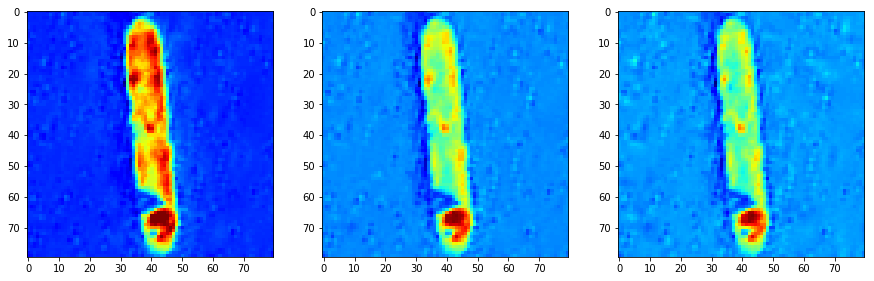

In [6]:
# Single picture plot
pic = x_re[666]
rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]
pic[0].shape
# Plot of this picture
plt.figure(2, figsize = (5*3, 5*1)) # figure size
plt.set_cmap('jet') # color map
# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)
plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)
plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
   
plt.show()

In [7]:
x_re_trn = x_re.transpose([0,2,3,1])
y_re = np_utils.to_categorical(y_data, num_classes=2)
print("Row data and reshaped data:\n")
print("Data Shape",x_data.shape)
print('Labels Shape',y_data.shape)
print('Reshaped Data Shape',x_re_trn.shape)
print('Reshaped Labels Shape',y_re.shape)
def describeDataset(a,b):
    print("\n'x' shape: %s."%(a.shape,))
    print("\n'y' shape: %s."%(b.shape,))
    print("\nUnique elements in y_reshaped: %s"%(np.unique(b)))
describeDataset(x_re_trn,y_re)

Row data and reshaped data:

Data Shape (3600, 19200)
Labels Shape (3600,)
Reshaped Data Shape (3600, 80, 80, 3)
Reshaped Labels Shape (3600, 2)

'x' shape: (3600, 80, 80, 3).

'y' shape: (3600, 2).

Unique elements in y_reshaped: [0. 1.]


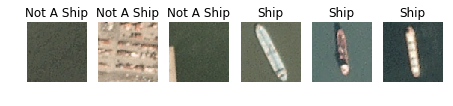

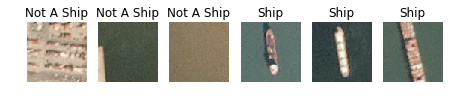

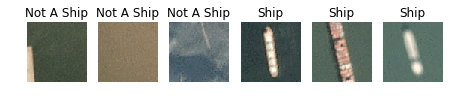

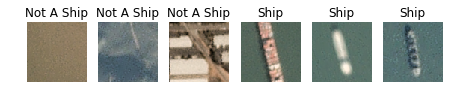

In [6]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(4):
        plt.figure(figsize=(10, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('Not A Ship')
            plt.imshow(a[row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('Ship')
            plt.imshow(b[row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

In [8]:
from sklearn.model_selection import train_test_split
xReshaped = xReshaped/255
#plotHistogram(xReshaped[100])

#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 43)
# Reduce Sample Size for DeBugging
x_train = x_train[0:300000] 
y_train = y_train[0:300000]
x_test = x_test[0:300000] 
y_test = y_test[0:300000]

x_trainReshaped,x_testReshaped,y_trainReshaped,y_testReshaped = train_test_split(xReshaped,yReshaped,test_size = 0.2 ,random_state = 43)
# Reduce Sample Size for DeBugging
x_trainReshaped = x_trainReshaped[0:300000] 
y_trainReshaped = y_trainReshaped[0:300000]
x_testReshaped = x_testReshaped[0:300000] 
y_testReshaped = y_testReshaped[0:300000]
print(x_train.shape,y_train.shape)
print(x.shape,y.shape)

(2880, 19200) (2880,)
(3600, 19200) (3600,)


In [9]:
 from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

RF: 0.936458 (0.011831)


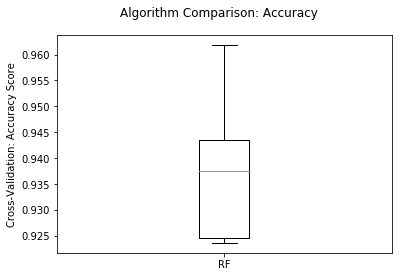

RF = RandomForestClassifier


In [21]:
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):
    print('\nCompare Multiple Classifiers:')
    print('\nK-Fold Cross-Validation Accuracy:\n')
    models = []
    models.append(('RF', RandomForestClassifier())) # sel
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a,b)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, a,b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)
   
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return
compareABunchOfDifferentModelsAccuracy(x_train,y_train,x_test,y_test)
def defineModels():
   print('RF = RandomForestClassifier')
   return
defineModels()


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.874653 (0.022312)
RF: 0.940625 (0.016757)
KNN: 0.919792 (0.014768)
SVM: 0.746875 (0.028986)
LSVM: 0.875000 (0.024006)
GNB: 0.642014 (0.028610)
DTC: 0.893056 (0.018228)


C:\program zzl\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\program zzl\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\program zzl\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\program zzl\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. U

XGB: 0.953472 (0.011948)
GBC: 0.947222 (0.012306)


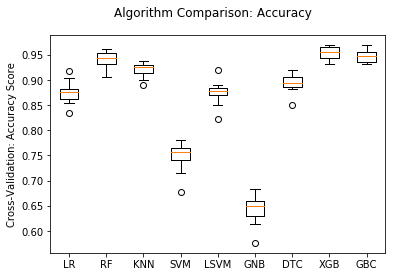

LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
XGB = XGBClassifier
GBC = GradientBoostingClassifier


In [10]:
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):   
    print('\nCompare Multiple Classifiers:')
    print('\nK-Fold Cross-Validation Accuracy:\n')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier())) # sel
    models.append(('KNN', KNeighborsClassifier()))  # sel
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB())) 
    models.append(('DTC', DecisionTreeClassifier())) # sel
    models.append(('XGB', XGBClassifier())) #sel
    models.append(('GBC', GradientBoostingClassifier())) #sel
  
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a,b)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, a,b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)
   
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return

compareABunchOfDifferentModelsAccuracy(x_train,y_train,x_test,y_test)

def defineModels():
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('XGB = XGBClassifier')
    print('GBC = GradientBoostingClassifier')
    return
defineModels()